## Indice

* [Definición](#Definición-de-grafo)

* [Grafo dirigido](#Grafo-dirigido-o-digrafo)

* [Representación matricial de grafos](#Representación-matricial-de-grafos)

* [Definiciones complementarias](#Definiciones-complementarias-de-grafos)

* [Grafos con nombre propio](#Grafos-con-nombre-propio)

* [Grado](#Grado)

* [Grafos bipartidos](#Grafos-bipartidos)


 

# Teoría de grafos

In [52]:
%matplotlib inline
#sci py libraries
import numpy as np
import scipy as sp
import scipy.linalg as la
#abstract graphs libraries
import networkx as nx
import random
#ploting and drawing libraries:
from nxpd import draw
import scipy.integrate as sint
import matplotlib.pyplot as plt

## Definición de grafo 

Un grafo es un par ordenado $\ G = (V, E) $ Donde:
* $\ V $ es un conjunto de **vertices** o **nodos**.
* $\ E $ es un conjunto de **aristas**, que relacionan estos **nodos**.

Ejemplo de grafo:

$\ G =  \text{ e0(v0,v3) = (v3,v0), e1(v3,v2) = (v2,v3), e2(v0,v1) = (v1,v0), e3(v2,v1) = (v1,v2)} $

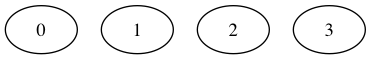

In [53]:
G3 = nx.MultiGraph()
G3.add_nodes_from(range(0,3))
H=nx.Graph()
H.add_path([0,1,2,3])
G3.add_nodes_from(H)
draw(G3, show='ipynb')


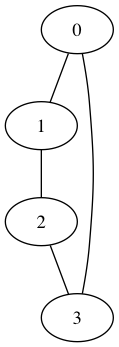

In [54]:
G = np.array([[0,0,0,1],
              [1,0,0,0],
              [0,1,0,1],
              [0,0,1,0]])

G = nx.from_numpy_matrix(G)
draw(G, show='ipynb')

## Grafo dirigido o digrafo

Un grafo es un par ordenado $\ G = (V, E) $ Donde:

* $\ V $ es un conjunto de **vertices** o **nodos**.
* $\ E $ es un conjunto de **pares ordenados** de vertices de $\ V $, a los elementos de $\ E $ que se llaman **arcos**.

Ejemplo de digrafo:

$\ G =  \text{ e0(v0,v3), e1(v3,v2), e2(v0,v1), e3(v2,v1)} $


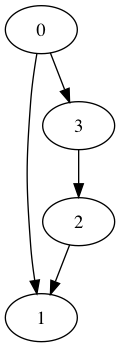

In [55]:
G = nx.DiGraph()
G.add_edges_from([(0,3), (3,2), (0,1), (2,1)])
draw(G, show='ipynb')

## Representación matricial de grafos

Existen diversas formas de representar los grafos, cuando tratamos de reprensetar de forma algoritmica lamás adecuada es la llamada **matriz de adyacencia**.

** definicion:** sea $\ G = (V, E) $  con $\ |V| = n $  y además $\ V = {v_1, v_2, v_3,...v_n} $ la **matriz de adyacencia** de $\ G $ respecto a los vértices anteriores, es una *matriz booleana* $\ n * n $, A, cuyo elemento $\ _i $, $\ _j $ vale $\ 1 $ cuando $\ v_i $ es adyacente a $\ v_j $ y $\ 0 $ cuando no lo es. Es decir, si $\ A = [a_i $ $\ _j] $ es la matriz de adyacencia, entonces:

\begin{equation*}
 a_i,_j = \begin{cases}
    1       & \quad \text{si } {v_i, v_j} \text{ es un lado de G}\\
    0  & \quad \text{en otro caso}\\
  \end{cases}
\end{equation*}


[[[[ Explicación sencilla de lo que es la matri de adyacencia ]]]]

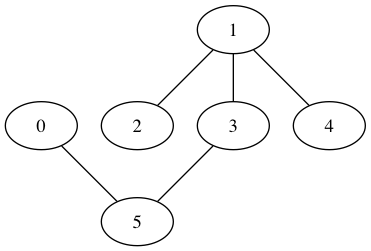

In [56]:
Adj = np.array([[0, 0, 0, 0, 0, 1], 
                [0, 0, 1, 1, 1, 0], 
                [0, 1, 0, 0, 0, 0], 
                [0, 1, 0, 0, 0, 1], 
                [0, 1, 0, 0, 0, 0],
                [1, 0, 0, 1, 0, 0]])

G = nx.from_numpy_matrix(Adj)
draw(G, show='ipynb')

las matrices de adyacencia pueden también emplearse para representar multigrafos con bucles. En tales casos, a matriz A no tiene por qué ser booleana.

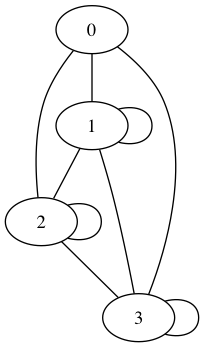

In [57]:
Adj1 = np.array([[0, 3, 1, 2], 
                [3, 1, 1, 1],
                [1, 1, 2, 2],
                [2, 1, 2, 1]
               ])

G1 = nx.from_numpy_matrix(Adj1)

draw(G1, show='ipynb')

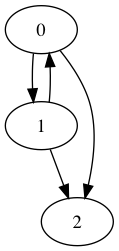

In [58]:
G = nx.DiGraph()
G.add_edges_from([(0,1), (0,2), (1,0), (1,2)])
draw(G, show='ipynb')

## Definiciones complementarias de grafos

### Nudo aislado 

Dentro de un grafo o digrado, un vertice es aislado si no está unido a otros vértices.



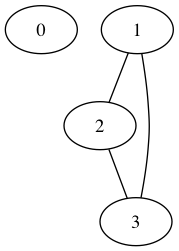

In [59]:
G = np.array([[0,0,0,0],
              [0,0,1,1],
              [0,1,0,1],
              [0,1,1,0]])

G = nx.from_numpy_matrix(G)
draw(G, show='ipynb')

### Bucle

es una arista o arco que une a un vertice consigo mismo. Si el grafo no contiene bucles será considerado **simple**

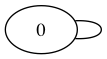

In [60]:
G = np.array([[1]])

G = nx.from_numpy_matrix(G)
draw(G, show='ipynb')


### Multigrafo

Es aquel grafo o digrafo que admite que algunas de sus aristas o arcos sea múltiple 

### Grafo ponderado

Es un grafo o digrafo en el que a cada arista o arco se le asigna un número real posivito, que se denomina peso. El peso total del grafo será la suma de sus aristas.

Este tipo de grafos alcanzan su maximo grado de aplicación en algoritmos como **dijkstra** o **Floyd** usados para encontrar la ruta más proxima entre dos puntos. y usados día a día por todos al usar herramientas de ruta, geoposicionamiento, o en servicios como Maps o Uber

/Users/danielhernandezvicente/Documents/programming/python/virtualEnv/jupiter/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/danielhernandezvicente/Documents/programming/python/virtualEnv/jupiter/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/danielhernandezvicente/Documents/programming/python/virtualEnv/jupiter/lib/python2.7/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/U

{(1, 3): <matplotlib.text.Text at 0x1056badd0>,
 (1, 4): <matplotlib.text.Text at 0x1056ba6d0>,
 (1, 5): <matplotlib.text.Text at 0x104e8bb10>,
 (3, 4): <matplotlib.text.Text at 0x1056bac50>,
 (5, 7): <matplotlib.text.Text at 0x105467c10>}

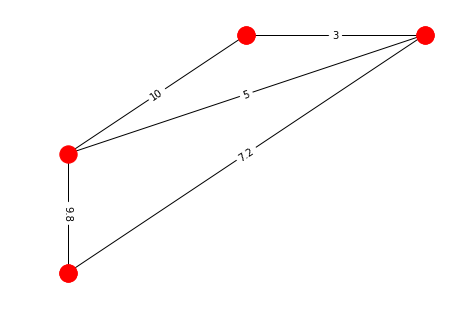

In [61]:
G=nx.Graph()
i=1
G.add_node(i,pos=(i,i))
G.add_node(2,pos=(2,2))
G.add_node(3,pos=(1,0))
G.add_node(4,pos=(3,2))
G.add_node(5,pos=(2,2))
G.add_node(6,pos=(1,0))
G.add_node(7,pos=(3,2))
G.add_edge(1,3,weight=9.8)
G.add_edge(1,4,weight=5)
G.add_edge(3,4,weight=7.2)
G.add_edge(1,5,weight=10)
G.add_edge(5,7,weight=3)
pos=nx.get_node_attributes(G,'pos')
nx.draw(G,pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

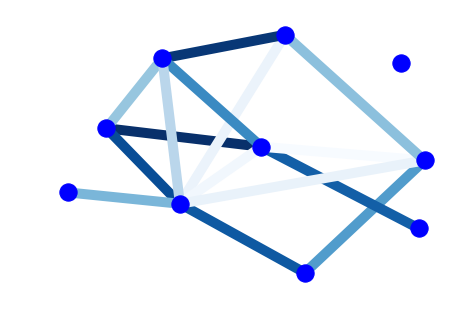

In [62]:
G = nx.gnp_random_graph(10,0.3)
for u,v,d in G.edges(data=True):
    d['weight'] = random.random()

edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

pos = nx.spring_layout(G)
nx.draw(G, pos, node_color='b', edgelist=edges, edge_color=weights, width=10.0, edge_cmap=plt.cm.Blues)


### Isomorfismo de grafos

Dos grafos simples $\ G1 = (V1, E1) $ y $\ G2 = (V2, E2) $, son isomorfos si existe una función $\ f: V1 -> v2 $ con las condiciónes:

* Es **biyectiva**

* Dos vértices $\ u,v \in V_1 $ son **adyacentes** en $\ G_1 $ si y solo si los vértices $\ f(u) $  y  $\ f(v) $ de $\ v_2 $ son **adyacentes** en $\ G_2 $

Cuando se da esta situación decimos que $\ f $ es un **isomorfismo de grafos** entre $\ G_1 $  y  $\ G_2 $

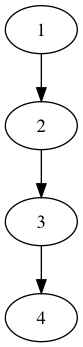

In [63]:
G1 = nx.DiGraph()
G1.add_path([1,2,3,4],weight=1)
draw(G1, show='ipynb')


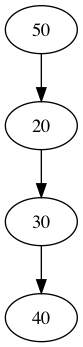

In [64]:
G2 = nx.DiGraph()
G2.add_path([50,20,30,40])
draw(G2, show='ipynb')

In [65]:
nx.is_isomorphic(G1, G2)

True

## Grafos con nombre propio

## Grafos completos 

Un grafo es **completo**:
    - es simple (no tiene bucles).
    - Cada uno de sus vértices es adyacente con todos los demas
    
Un digrafo se llamará **completo** cuando para cada nodo existe un par de  **arcos** que los unen en cada sentido. 


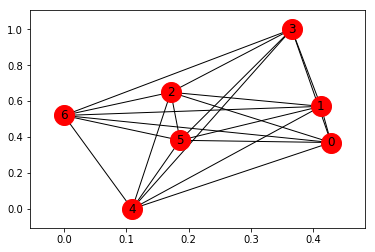

In [66]:
G5 = nx.complete_graph(7)
nx.draw_networkx(G5, node_color='r', node_size=400)

## Grafo lineal

es un grafo $\ G = (V,E) $ en el que cada nodo $\ V_i $ es adyacente solo a $\ v_i -1 $ (en caso de existir)  y a $\ v_i+1 $ (en caso de existir) 

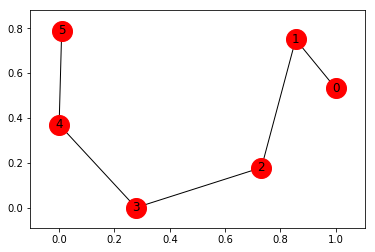

In [67]:
G5 = nx.path_graph(6)
nx.draw_networkx(G5, node_color='r', node_size=400)

## Grafo circular

es un grafo que cumple las propiedades del grafo lineal pero se añade que para  $\ G = (V,E) $ en el que cada nodo $\ V_1 $ es adyacente a $\ v_n $ 

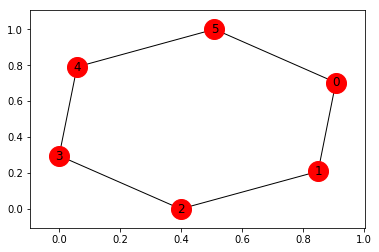

In [68]:
G5 = nx.cycle_graph(6)
nx.draw_networkx(G5, node_color='r', node_size=400)

## Grafo vacío

es un grafo $\ G = (V,E) $ En el que $\ E =\emptyset $ (Todos sus vertices son aislados).

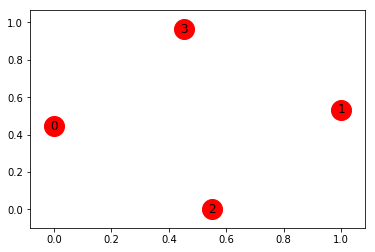

In [69]:
G5 = nx.empty_graph(4)
nx.draw_networkx(G5, node_color='r', node_size=400)

## Grafo Regular

es un grafo $\ G = (V,E) $ donde cada vértice tiene el mismo grado o valencia

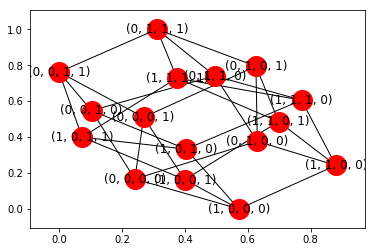

In [70]:
G5 = nx.hypercube_graph(4)
nx.draw_networkx(G5, node_color='r', node_size=400)

## Grafos platónicos

Son los cinco grafos asociados a los cinco poliedros regulares (sólidos platónicos)


		 Tetraedro


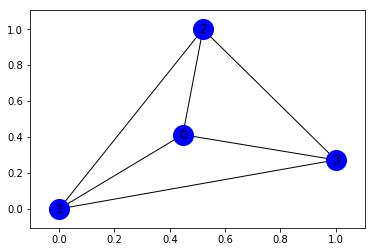

In [71]:
G5 = nx.tetrahedral_graph()
print "\n\t\t Tetraedro"
nx.draw_networkx(G5, node_color='b', node_size=400)


		 Cubo


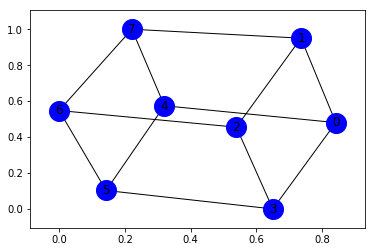

In [72]:
G5 = nx.cubical_graph()
print "\n\t\t Cubo"
nx.draw_networkx(G5, node_color='b', node_size=400)


		 Octaedro


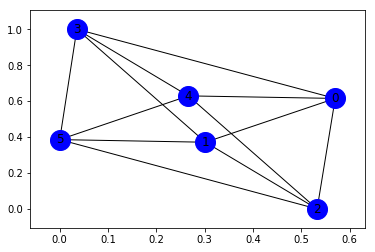

In [73]:
G5 = nx.octahedral_graph()
print "\n\t\t Octaedro"
nx.draw_networkx(G5, node_color='b', node_size=400)


		 Dodecahedral


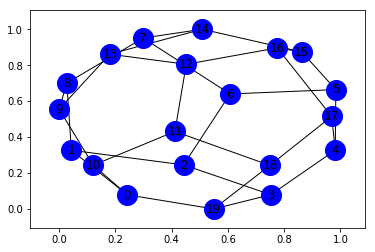

In [74]:
G5 = nx.dodecahedral_graph()
print "\n\t\t Dodecahedral"
nx.draw_networkx(G5, node_color='b', node_size=400)


		 Icosaedro


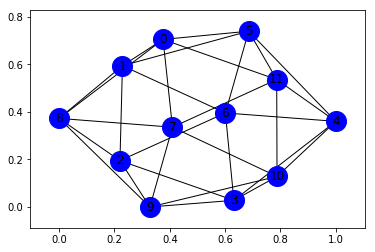

In [75]:
G5 = nx.icosahedral_graph()
print "\n\t\t Icosaedro"
nx.draw_networkx(G5, node_color='b', node_size=400)

## Grado 

### Grado de un nodo

Sea $\ v $ un vértice que un grafo, un digrafo o un multigrafo $\ G = (V,E) $. se llama grado de $\ gr(vértice) $ al número de aristas $\ E $ que inciden en $\ v $


		 El grado del nodo 1 es 3

		 El grado del nodo 1 es 5


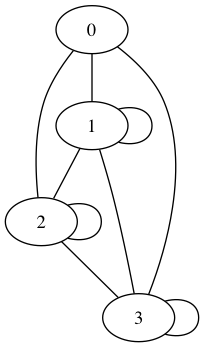

In [76]:
Adj1 = np.array([[0, 3, 1, 2], 
                [3, 1, 1, 1],
                [1, 1, 2, 2],
                [2, 1, 2, 1]
               ])

G1 = nx.from_numpy_matrix(Adj1)

print "\n\t\t El grado del nodo 1 es " + str(G1.degree(0))

print "\n\t\t El grado del nodo 1 es " + str(G1.degree(3))


draw(G1, show='ipynb')

### Grado de un grafo 

sea un grado o multigrafo $\ G $ se llama grado de $\ G $ o $\ gr(G) $ a la suma de los grados de todos los vértices. El grado será al doble del número de aristas o de arcos del grafo

\begin{equation*}
gr(G) =  \sum_{v \in V}gr(v)= 2 |E|
\end{equation*}


En un **digrafo** existen los grados de entrada y de salida. Don del grado del grafo será la suma de los grados de entrada más los de salida.



		 El grado del grafo  es 24


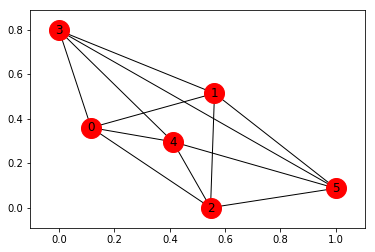

In [77]:
G5 = nx.octahedral_graph()

sum = 0

for i in G5.degree([0,1,2,3,4,5]).values():
 sum += i

print "\n\t\t El grado del grafo  es " + str(sum)

nx.draw_networkx(G5, node_color='r', node_size=400)

## Grafos bipartidos

Un grafo $\ G = (V,E) $ se dirá **bipartido** si, para una cierta partición de $\ v $ en en dos subconjuntos $\ v_1 $ y $\ V_2 $ no vaciós($\ V_1 \cup	 V_2 = V, V_1 \cap V_2 = \emptyset $) acontece que toda arista $\ e \in E $ une un vértice de $\ v_2 $ es decir $\ e = { v_1, v_2 } $ con $\ v_1 \in V_1 $ y $\ v_2 \in V_2 $. este grafo se representa de la forma:

\begin{equation*}
G = (V_1 \cup V_2, E)
\end{equation*}


### Ejercicio de ejemplo de grafo bipartido

Primero creamos la primera partición del grafo.


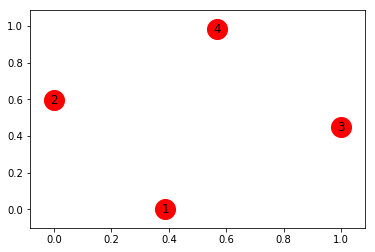

In [78]:
B = nx.Graph()
B.add_nodes_from([1,2,3,4], bipartite=0) # Add the node attribute "bipartite"

nx.draw_networkx(B, node_color='r', node_size=400)


Después creamos la segunda y creamos las uniones entre nodos de la forma bipartida:

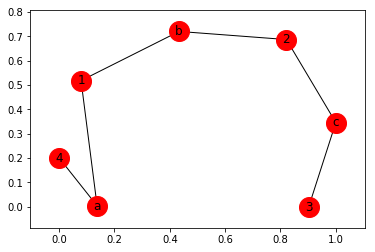

In [79]:

B.add_nodes_from(['a','b','c'], bipartite=1)
B.add_edges_from([(1,'a'), (1,'b'), (2,'b'), (2,'c'), (3,'c'), (4,'a')])
nx.draw_networkx(B, node_color='r', node_size=400)


Verificamos que es un grafo bipartido.

In [80]:
nx.is_bipartite(B)

True

Eliminamos una de las conexiones:

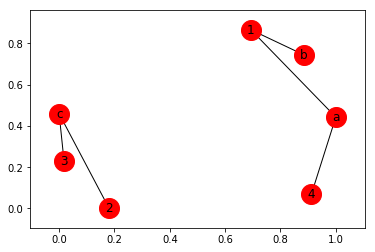

In [81]:
B.remove_edge(2,'b')
nx.draw_networkx(B, node_color='r', node_size=400)


Verificamos que ya no estamos ante un grafo bipartido:

In [82]:
nx.is_bipartite(B)

True

### Grafo bipartido completo

Se dice de aquel grafo $\ G = (U \cup V, E) $ que posee cada uno de los vertices $\ u \in U $ es vecino de todos los vertices $\ v \in V $

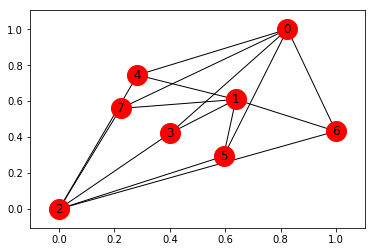

In [83]:
aseq1 = 3
aseq2 = 5

bipartite_complete = nx.complete_bipartite_graph(aseq1,aseq2,)
nx.draw_networkx(bipartite_complete, node_color='r', node_size=400)

## Referencias

* Félix García Merayo (2015). Matemática discreta 3ª edición.

* Juan De Burgos Román (2012). Números y grafos.

* Documentación de Jupyter. [link](https://jupyter.readthedocs.io/en/latest/)

* Documentación de Ipython. [link](https://ipython.org/)

* Documentación de networkx. [link](https://www.latex-project.org/)

* Documentación de latext. [link](https://www.latex-project.org/)

